In [1]:
pip install nashpy


In [2]:
import nashpy as nash
import numpy as np

# Payoff matrix for Player A
A = np.array([
    [0, -1, 1],   # Rock
    [1, 0, -1],   # Paper
    [-1, 1, 0]    # Scissors
])

# Player B has the opposite payoffs
B = -A

# Create the game
game = nash.Game(A, B)
print("Rock-Paper-Scissors Game Created\n")

# Find mixed strategy equilibrium
print("🎯 Mixed Strategy Nash Equilibrium:")
for eq in game.support_enumeration():
    A_strategy, B_strategy = eq
    print(f"Player A: Rock={A_strategy[0]:.2f}, Paper={A_strategy[1]:.2f}, Scissors={A_strategy[2]:.2f}")
    print(f"Player B: Rock={B_strategy[0]:.2f}, Paper={B_strategy[1]:.2f}, Scissors={B_strategy[2]:.2f}")


Rock-Paper-Scissors Game Created

🎯 Mixed Strategy Nash Equilibrium:
Player A: Rock=0.33, Paper=0.33, Scissors=0.33
Player B: Rock=0.33, Paper=0.33, Scissors=0.33


In [6]:
import random

moves = ["Rock", "Paper", "Scissors"]

# Define outcome matrix: A vs B → result
# (A_move, B_move): result → 0 = draw, 1 = A wins, -1 = B wins
outcomes = {
    ("Rock", "Rock"): 0,
    ("Rock", "Paper"): -1,
    ("Rock", "Scissors"): 1,
    ("Paper", "Rock"): 1,
    ("Paper", "Paper"): 0,
    ("Paper", "Scissors"): -1,
    ("Scissors", "Rock"): -1,
    ("Scissors", "Paper"): 1,
    ("Scissors", "Scissors"): 0
}

In [7]:
def play_rps_round():
    A_move = random.choice(moves)
    B_move = random.choice(moves)
    result = outcomes[(A_move, B_move)]
    return A_move, B_move, result

In [8]:
def simulate_rps(rounds=10):
    A_score = 0
    B_score = 0
    draws = 0

    print(f"\n🎮 Simulating {rounds} rounds of Rock-Paper-Scissors:\n")

    for i in range(1, rounds + 1):
        A_move, B_move, result = play_rps_round()

        print(f"Round {i}: Player A → {A_move}, Player B → {B_move}", end=" ")

        if result == 1:
            A_score += 1
            print("→ 🏆 A wins")
        elif result == -1:
            B_score += 1
            print("→ 🏆 B wins")
        else:
            draws += 1
            print("→ 🤝 Draw")

    print("\n📊 Final Scoreboard:")
    print(f"Player A Wins: {A_score}")
    print(f"Player B Wins: {B_score}")
    print(f"Draws: {draws}")

    if A_score > B_score:
        print("\n🎉 Overall Winner: Player A")
    elif B_score > A_score:
        print("\n🎉 Overall Winner: Player B")
    else:
        print("\n⚖️ It's a tie overall!")

if __name__ == "__main__":
    simulate_rps(10)



🎮 Simulating 10 rounds of Rock-Paper-Scissors:

Round 1: Player A → Paper, Player B → Rock → 🏆 A wins
Round 2: Player A → Rock, Player B → Rock → 🤝 Draw
Round 3: Player A → Rock, Player B → Rock → 🤝 Draw
Round 4: Player A → Paper, Player B → Scissors → 🏆 B wins
Round 5: Player A → Rock, Player B → Paper → 🏆 B wins
Round 6: Player A → Rock, Player B → Paper → 🏆 B wins
Round 7: Player A → Paper, Player B → Paper → 🤝 Draw
Round 8: Player A → Scissors, Player B → Rock → 🏆 B wins
Round 9: Player A → Paper, Player B → Paper → 🤝 Draw
Round 10: Player A → Rock, Player B → Rock → 🤝 Draw

📊 Final Scoreboard:
Player A Wins: 1
Player B Wins: 4
Draws: 5

🎉 Overall Winner: Player B


In [4]:
!pip install matplotlib

In [9]:
import random
import matplotlib.pyplot as plt

# Available moves
moves = ["Rock", "Paper", "Scissors"]

# Result mapping: (A_move, B_move) → result
# result: 0 = draw, 1 = A wins, -1 = B wins
outcomes = {
    ("Rock", "Rock"): 0,
    ("Rock", "Paper"): -1,
    ("Rock", "Scissors"): 1,
    ("Paper", "Rock"): 1,
    ("Paper", "Paper"): 0,
    ("Paper", "Scissors"): -1,
    ("Scissors", "Rock"): -1,
    ("Scissors", "Paper"): 1,
    ("Scissors", "Scissors"): 0
}

In [10]:
# Play one round
def play_rps_round():
    A_move = random.choice(moves)
    B_move = random.choice(moves)
    result = outcomes[(A_move, B_move)]
    return A_move, B_move, result


🎮 Simulating 20 rounds of Rock-Paper-Scissors:

Round 1: A → Scissors, B → Rock → 🏆 B wins
Round 2: A → Scissors, B → Scissors → 🤝 Draw
Round 3: A → Scissors, B → Rock → 🏆 B wins
Round 4: A → Paper, B → Paper → 🤝 Draw
Round 5: A → Rock, B → Rock → 🤝 Draw
Round 6: A → Paper, B → Scissors → 🏆 B wins
Round 7: A → Paper, B → Scissors → 🏆 B wins
Round 8: A → Scissors, B → Scissors → 🤝 Draw
Round 9: A → Scissors, B → Scissors → 🤝 Draw
Round 10: A → Paper, B → Paper → 🤝 Draw
Round 11: A → Scissors, B → Scissors → 🤝 Draw
Round 12: A → Scissors, B → Paper → 🏆 A wins
Round 13: A → Rock, B → Rock → 🤝 Draw
Round 14: A → Paper, B → Rock → 🏆 A wins
Round 15: A → Paper, B → Paper → 🤝 Draw
Round 16: A → Rock, B → Scissors → 🏆 A wins
Round 17: A → Scissors, B → Rock → 🏆 B wins
Round 18: A → Rock, B → Scissors → 🏆 A wins
Round 19: A → Rock, B → Paper → 🏆 B wins
Round 20: A → Paper, B → Rock → 🏆 A wins

📊 Final Scoreboard:
Player A Wins: 5
Player B Wins: 6
Draws: 9


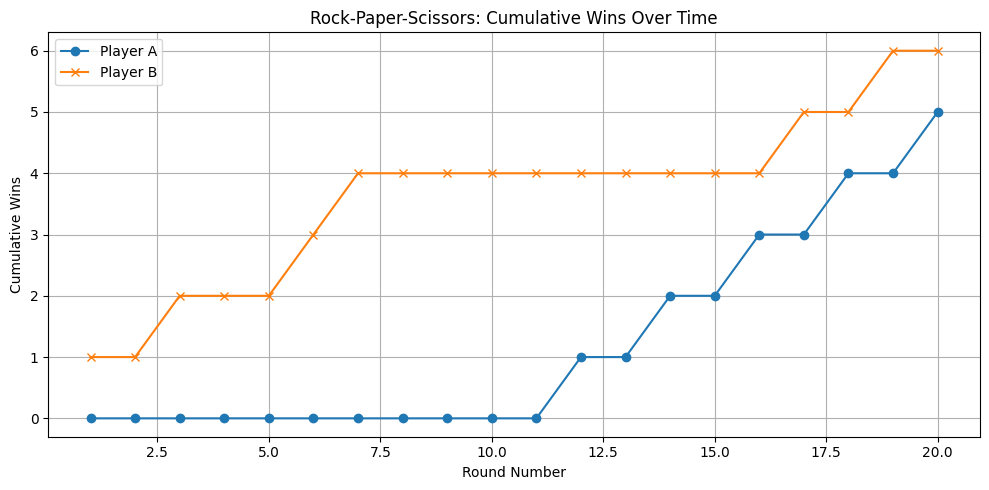

In [11]:
# Simulate game and plot score trend
def simulate_rps_with_plot(rounds=10):
    A_score = 0
    B_score = 0

    A_scores = []
    B_scores = []

    print(f"\n🎮 Simulating {rounds} rounds of Rock-Paper-Scissors:\n")

    for i in range(1, rounds + 1):
        A_move, B_move, result = play_rps_round()

        if result == 1:
            A_score += 1
            outcome = "🏆 A wins"
        elif result == -1:
            B_score += 1
            outcome = "🏆 B wins"
        else:
            outcome = "🤝 Draw"

        A_scores.append(A_score)
        B_scores.append(B_score)

        print(f"Round {i}: A → {A_move}, B → {B_move} → {outcome}")

    # Final scoreboard
    print("\n📊 Final Scoreboard:")
    print(f"Player A Wins: {A_score}")
    print(f"Player B Wins: {B_score}")
    print(f"Draws: {rounds - A_score - B_score}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, rounds+1), A_scores, label="Player A", marker='o')
    plt.plot(range(1, rounds+1), B_scores, label="Player B", marker='x')
    plt.title("Rock-Paper-Scissors: Cumulative Wins Over Time")
    plt.xlabel("Round Number")
    plt.ylabel("Cumulative Wins")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    simulate_rps_with_plot(20)
